# ANN-to-SNN Conversion for a Convolutional Neural Network (CNN)

Download the Jupyter notebook : [MNIST_CNN.ipynb](https://raw.githubusercontent.com/ANNarchy/ANNarchy.github.io/master/docs/example/MNIST_CNN.ipynb)

This script will demonstrate the required steps to transform a convolutional neural network trained on MNIST using TensorFlow into an SNN network usable in ANNarchy.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf


## Load MNIST

First we need to obain the MNIST test. The following code downloads the required data if not already in the directory *mnist_testset*.

In [2]:
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

## TensorFlow Network

The TensorFlow network was build with the functional API as follow:

```
inputs = tf.keras.Input(shape = input_shape)
cx = tf.keras.layers.Conv2D(12, kernel_size=(5,5), activation='relu', padding = 'same',use_bias=False)(inputs)
cx = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cx)
cx = tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', padding = 'same',use_bias=False)(cx)
cx = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cx)
cx = tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', padding = 'same',use_bias=False)(cx)
cx = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cx)
cx = tf.keras.layers.Dropout(0.25)(cx)
x = tf.keras.layers.Flatten()(cx)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=False)(x)

model= tf.keras.Model(inputs,outputs)
```

We used the standard gradient descent (SGD) optimizer and used the categorical crossentropy loss. 

In [3]:
inputs = tf.keras.Input(shape = (28,28,1))
cx = tf.keras.layers.Conv2D(12, 
                            kernel_size=(5,5),
                            activation='relu',
                            padding = 'same',
                            use_bias=False)(inputs)
cx = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cx)
cx = tf.keras.layers.Conv2D(64,
                            kernel_size=(5,5),
                            activation='relu',
                            padding = 'same',
                            use_bias=False)(cx)
cx = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cx)
cx = tf.keras.layers.Conv2D(64,
                            kernel_size=(5,5),
                            activation='relu',
                            padding = 'same',
                            use_bias=False)(cx)
cx = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cx)
cx = tf.keras.layers.Dropout(0.25)(cx)
x = tf.keras.layers.Flatten()(cx)
outputs = tf.keras.layers.Dense(10,
                                activation='softmax',
                                use_bias=False)(x)

model= tf.keras.Model(inputs,outputs)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 12)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        19200     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          102400

## Train the network

We trained the network for 50 epochs with a batch size of 128, and after training, the network was saved with the ``` model.save() ``` function.

In [4]:
history = model.fit(
    X_train, T_train,       # training data
    batch_size=128,         # batch size
    epochs=50,              # Maximum number of epochs
    validation_split=0.1,   # Percentage of training data used for validation
)
model.save("cnn.h5")

Epoch 1/50
422/422 [==============================] - 20s 46ms/step - loss: 2.2792 - accuracy: 0.1866 - val_loss: 2.2462 - val_accuracy: 0.3307
Epoch 2/50
422/422 [==============================] - 19s 45ms/step - loss: 2.2124 - accuracy: 0.3295 - val_loss: 2.1577 - val_accuracy: 0.4845
Epoch 3/50
422/422 [==============================] - 19s 45ms/step - loss: 2.0810 - accuracy: 0.4471 - val_loss: 1.9457 - val_accuracy: 0.6758
Epoch 4/50
422/422 [==============================] - 19s 46ms/step - loss: 1.7805 - accuracy: 0.5437 - val_loss: 1.4756 - val_accuracy: 0.7463
Epoch 5/50
422/422 [==============================] - 26s 60ms/step - loss: 1.3324 - accuracy: 0.6330 - val_loss: 0.9566 - val_accuracy: 0.8203
Epoch 6/50
422/422 [==============================] - 26s 62ms/step - loss: 0.9588 - accuracy: 0.7251 - val_loss: 0.6487 - val_accuracy: 0.8672
Epoch 7/50
422/422 [==============================] - 26s 63ms/step - loss: 0.7373 - accuracy: 0.7826 - val_loss: 0.4861 - val_accuracy:

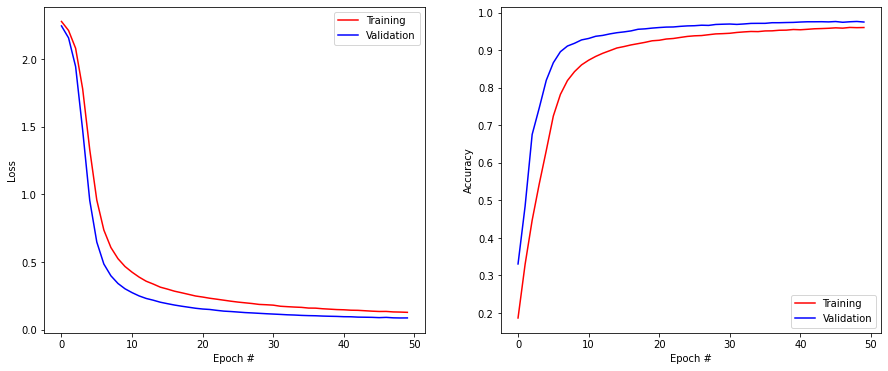

In [5]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Initialize the Converter

As the first step, we create an instance of the ANN-to-SNN conversion tool. The class receives the *input_encoding* parameter, which is the type of input encoding we want to use. By default, there are *intrinsically bursting* ("IB"), *phase shift oscillation* ("PSO"), *Poisson* ("poisson"), and *chattering* ("CH") available. 

In [6]:
from ANNarchy.extensions.ann_to_snn_conversion import ANNtoSNNConverter
snn_converter = ANNtoSNNConverter(input_encoding='IB')


ANNarchy 4.7 (4.7.3b) on linux (posix).


After that, we provide the TensorFlow model stored as h5py file to the conversion tool. The print-out of the network structure of the imported network is suppressed when *show_info*=False is provided to *init_from_keras_model*.

In [8]:
snn_converter.init_from_keras_model("cnn.h5")


Selected In/Out
----------------------
input encoding: IB
read-out method: spike_count

Show populations/layer
----------------------
conv2d geometry =  (28, 28, 12)
max_pooling2d geometry = (14, 14, 12)
conv2d_1 geometry =  (14, 14, 64)
max_pooling2d_1 geometry = (7, 7, 64)
conv2d_2 geometry =  (7, 7, 64)
max_pooling2d_2 geometry = (3, 3, 64)
dense geometry =  10

Show Connections/Projections
----------------------
--------
input_1  ->  conv2d
(28, 28) (28, 28, 12)
weight_m : (12, 5, 5)
--------
conv2d  ->  max_pooling2d operation =  max
--------
max_pooling2d  ->  conv2d_1
(14, 14, 12) (14, 14, 64)
weight_m : (64, 5, 5, 12)
--------
conv2d_1  ->  max_pooling2d_1 operation =  max
--------
max_pooling2d_1  ->  conv2d_2
(7, 7, 64) (7, 7, 64)
weight_m : (64, 5, 5, 64)
--------
conv2d_2  ->  max_pooling2d_2 operation =  max
--------
max_pooling2d_2  ->  dense
(3, 3, 64) (10,)
weight_m : (10, 576)
Compiling network 1...  OK 


## Inference for 200 Samples

When the network has been built successfully, we can perform a test using 200 samples. Using *duration_per_sample* the number of steps for one image can be adjusted.

In [9]:
predictions = snn_converter.predict(X_test, duration_per_sample=200)

100%|███████████████████████████████████| 10000/10000 [4:32:43<00:00,  1.64s/it]


Using the recored predictions, we can now compute the accuracy using scikit-learn for 200 samples.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
classification_report(ab_labl[:200], predictions)
accuracy_score(ab_labl[:200], predictions)
